In [1]:
import pandas as pd

# Load your data
df = pd.read_csv('site_1_train_data.csv')  # Change filename as needed

# Basic info
print("=" * 50)
print("DATASET SHAPE:")
print(df.shape)
print("\n" + "=" * 50)
print("COLUMN NAMES:")
print(df.columns.tolist())
print("\n" + "=" * 50)
print("DATA TYPES:")
print(df.dtypes)
print("\n" + "=" * 50)
print("MISSING VALUES:")
print(df.isnull().sum())
print("\n" + "=" * 50)
print("BASIC STATISTICS:")
print(df.describe())
print("\n" + "=" * 50)
print("FIRST FEW ROWS:")
print(df.head(10))
print("\n" + "=" * 50)
print("CORRELATION WITH TARGETS:")
print(df.corr()[['O3_target', 'NO2_target']].sort_values('O3_target', ascending=False))

DATASET SHAPE:
(25081, 16)

COLUMN NAMES:
['year', 'month', 'day', 'hour', 'O3_forecast', 'NO2_forecast', 'T_forecast', 'q_forecast', 'u_forecast', 'v_forecast', 'w_forecast', 'NO2_satellite', 'HCHO_satellite', 'ratio_satellite', 'O3_target', 'NO2_target']

DATA TYPES:
year               float64
month              float64
day                float64
hour               float64
O3_forecast        float64
NO2_forecast       float64
T_forecast         float64
q_forecast         float64
u_forecast         float64
v_forecast         float64
w_forecast         float64
NO2_satellite      float64
HCHO_satellite     float64
ratio_satellite    float64
O3_target          float64
NO2_target         float64
dtype: object

MISSING VALUES:
year                   0
month                  0
day                    0
hour                   0
O3_forecast            0
NO2_forecast           0
T_forecast             0
q_forecast             0
u_forecast             0
v_forecast             0
w_forecast       

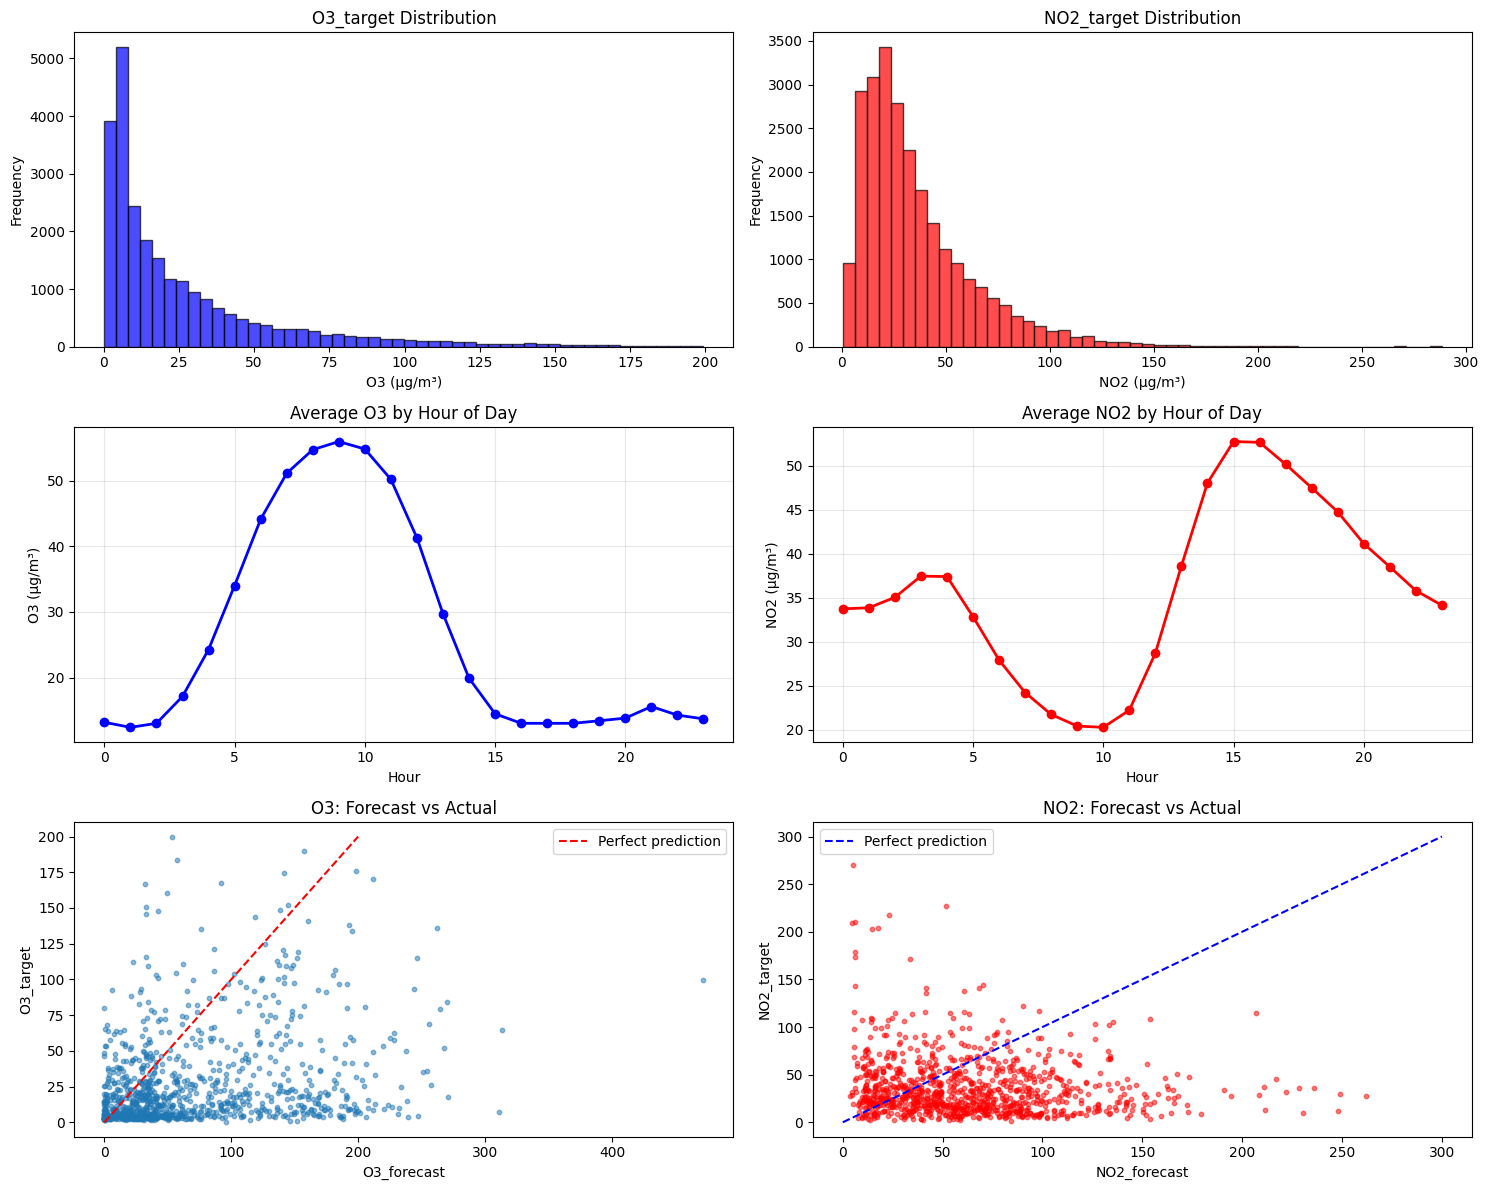

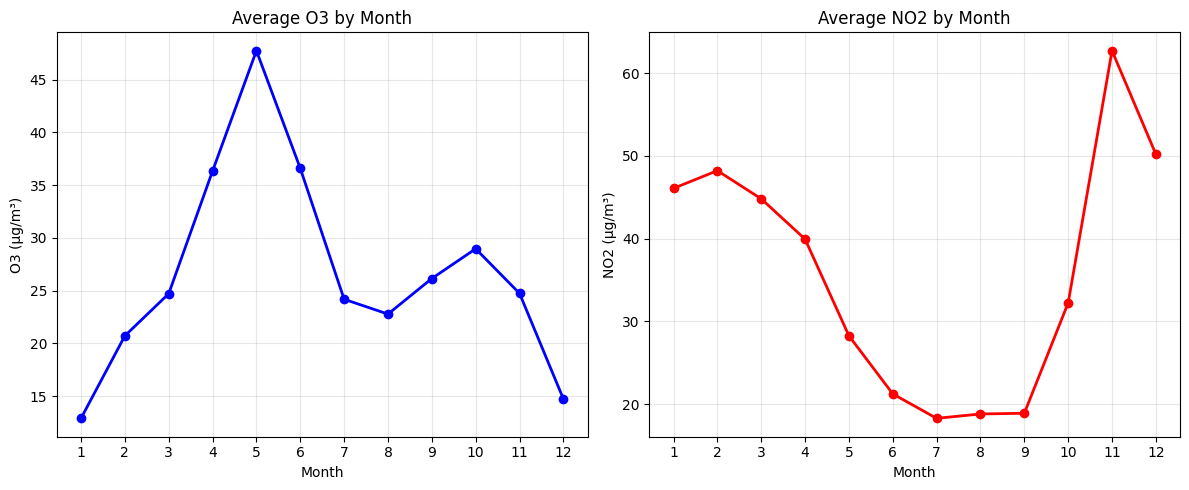

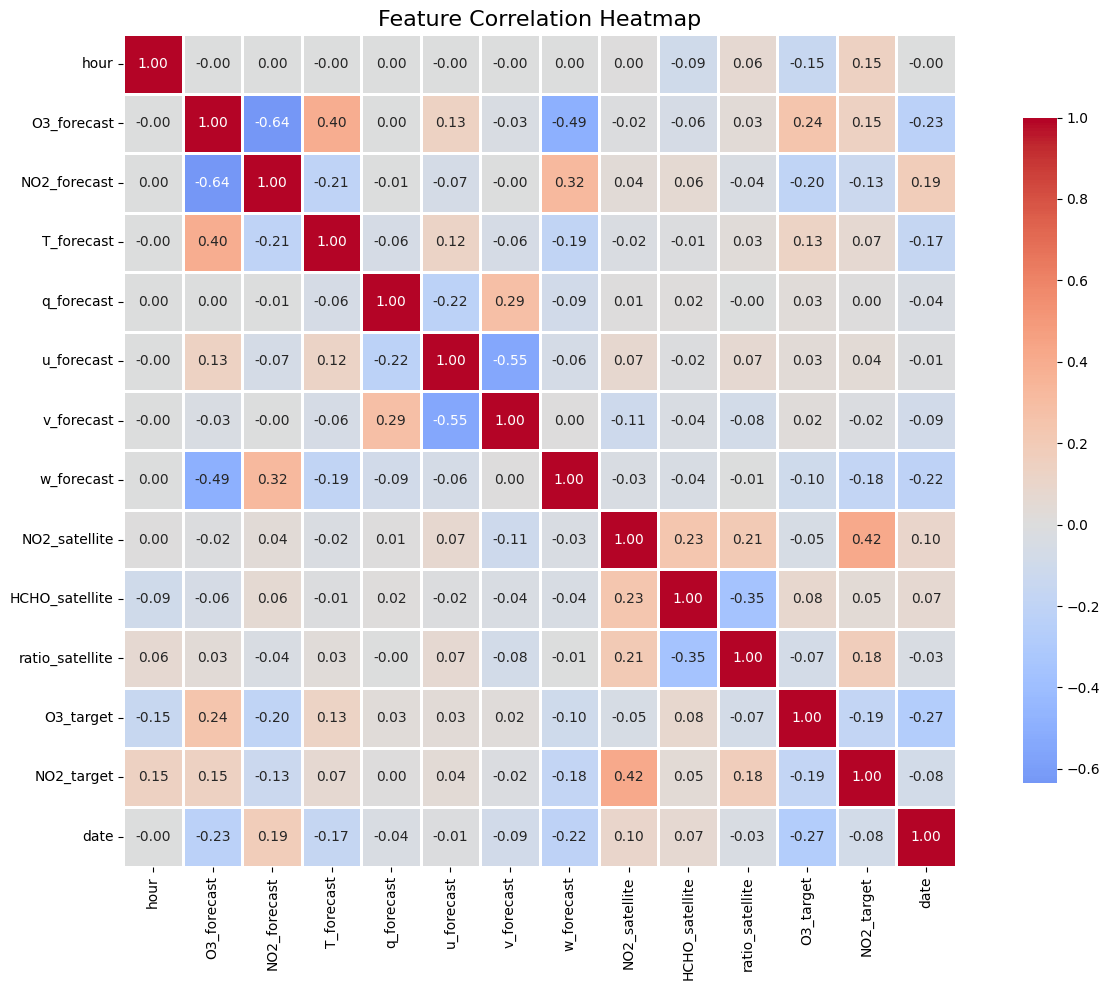


SATELLITE DATA AVAILABILITY:
Days with satellite data: 933
Days without satellite data: 24148
Percentage available: 3.72%


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('site_1_train_data.csv')

# Create figure with subplots
fig, axes = plt.subplots(3, 2, figsize=(15, 12))

# 1. Target distributions
axes[0, 0].hist(df['O3_target'], bins=50, alpha=0.7, color='blue', edgecolor='black')
axes[0, 0].set_title('O3_target Distribution')
axes[0, 0].set_xlabel('O3 (μg/m³)')
axes[0, 0].set_ylabel('Frequency')

axes[0, 1].hist(df['NO2_target'], bins=50, alpha=0.7, color='red', edgecolor='black')
axes[0, 1].set_title('NO2_target Distribution')
axes[0, 1].set_xlabel('NO2 (μg/m³)')
axes[0, 1].set_ylabel('Frequency')

# 2. Hourly patterns
hourly_o3 = df.groupby('hour')['O3_target'].mean()
hourly_no2 = df.groupby('hour')['NO2_target'].mean()

axes[1, 0].plot(hourly_o3.index, hourly_o3.values, marker='o', linewidth=2, color='blue')
axes[1, 0].set_title('Average O3 by Hour of Day')
axes[1, 0].set_xlabel('Hour')
axes[1, 0].set_ylabel('O3 (μg/m³)')
axes[1, 0].grid(True, alpha=0.3)

axes[1, 1].plot(hourly_no2.index, hourly_no2.values, marker='o', linewidth=2, color='red')
axes[1, 1].set_title('Average NO2 by Hour of Day')
axes[1, 1].set_xlabel('Hour')
axes[1, 1].set_ylabel('NO2 (μg/m³)')
axes[1, 1].grid(True, alpha=0.3)

# 3. Forecast vs Actual
sample = df.sample(1000)  # Sample for clarity
axes[2, 0].scatter(sample['O3_forecast'], sample['O3_target'], alpha=0.5, s=10)
axes[2, 0].plot([0, 200], [0, 200], 'r--', label='Perfect prediction')
axes[2, 0].set_title('O3: Forecast vs Actual')
axes[2, 0].set_xlabel('O3_forecast')
axes[2, 0].set_ylabel('O3_target')
axes[2, 0].legend()

axes[2, 1].scatter(sample['NO2_forecast'], sample['NO2_target'], alpha=0.5, s=10, color='red')
axes[2, 1].plot([0, 300], [0, 300], 'b--', label='Perfect prediction')
axes[2, 1].set_title('NO2: Forecast vs Actual')
axes[2, 1].set_xlabel('NO2_forecast')
axes[2, 1].set_ylabel('NO2_target')
axes[2, 1].legend()

plt.tight_layout()
plt.savefig('pollution_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# 4. Seasonal patterns
df['date'] = pd.to_datetime(df[['year', 'month', 'day']])
monthly_avg = df.groupby('month')[['O3_target', 'NO2_target']].mean()

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(monthly_avg.index, monthly_avg['O3_target'], marker='o', linewidth=2, color='blue')
plt.title('Average O3 by Month')
plt.xlabel('Month')
plt.ylabel('O3 (μg/m³)')
plt.xticks(range(1, 13))
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(monthly_avg.index, monthly_avg['NO2_target'], marker='o', linewidth=2, color='red')
plt.title('Average NO2 by Month')
plt.xlabel('Month')
plt.ylabel('NO2 (μg/m³)')
plt.xticks(range(1, 13))
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('seasonal_patterns.png', dpi=300, bbox_inches='tight')
plt.show()

# 5. Correlation heatmap
plt.figure(figsize=(14, 10))
correlation_matrix = df.drop(['year', 'month', 'day'], axis=1).corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Heatmap', fontsize=16)
plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

# 6. Check satellite data availability
print("\n" + "="*50)
print("SATELLITE DATA AVAILABILITY:")
print("="*50)
satellite_available = df[['NO2_satellite', 'HCHO_satellite', 'ratio_satellite']].notna().any(axis=1)
print(f"Days with satellite data: {satellite_available.sum()}")
print(f"Days without satellite data: {(~satellite_available).sum()}")
print(f"Percentage available: {satellite_available.sum()/len(df)*100:.2f}%")

In [3]:
import os

SAVE_DIR = "plots"
os.makedirs(SAVE_DIR, exist_ok=True)

def save_plot(filename):
    plt.savefig(os.path.join(SAVE_DIR, filename), dpi=300, bbox_inches='tight')
    print(f"✅ Saved: {os.path.join(SAVE_DIR, filename)}")


# analysing all site data in here

Site 1 loaded: (25081, 16)
Site 2 loaded: (25969, 16)
Site 3 loaded: (21913, 16)
Site 4 loaded: (24505, 16)
Site 5 loaded: (25081, 16)
Site 6 loaded: (26353, 16)
Site 7 loaded: (22777, 16)

SITE COMPARISON:
     Site   Rows    O3_mean     O3_std   NO2_mean    NO2_std  O3_max  NO2_max  Satellite_coverage
0  site_1  25081  26.685846  31.532385  35.846456  28.289381  199.35   288.57            3.297317
1  site_2  25969  26.066287  30.138552  33.425066  24.411113  199.00   219.23            3.323193
2  site_3  21913  34.036256  40.285963  53.004816  35.769589  199.30   293.10            3.276594
3  site_4  24505  41.570014  36.352691  32.273174  23.580325  199.20   192.33            3.289125
4  site_5  25081  30.145630  31.581547  53.533371  34.601227  199.90   284.70            3.261433
5  site_6  26353  21.014273  25.817975  24.235430  18.350731  197.10   207.82            3.214055
6  site_7  22777  35.890433  36.774676  32.842614  23.649665  197.80   235.48            3.323528


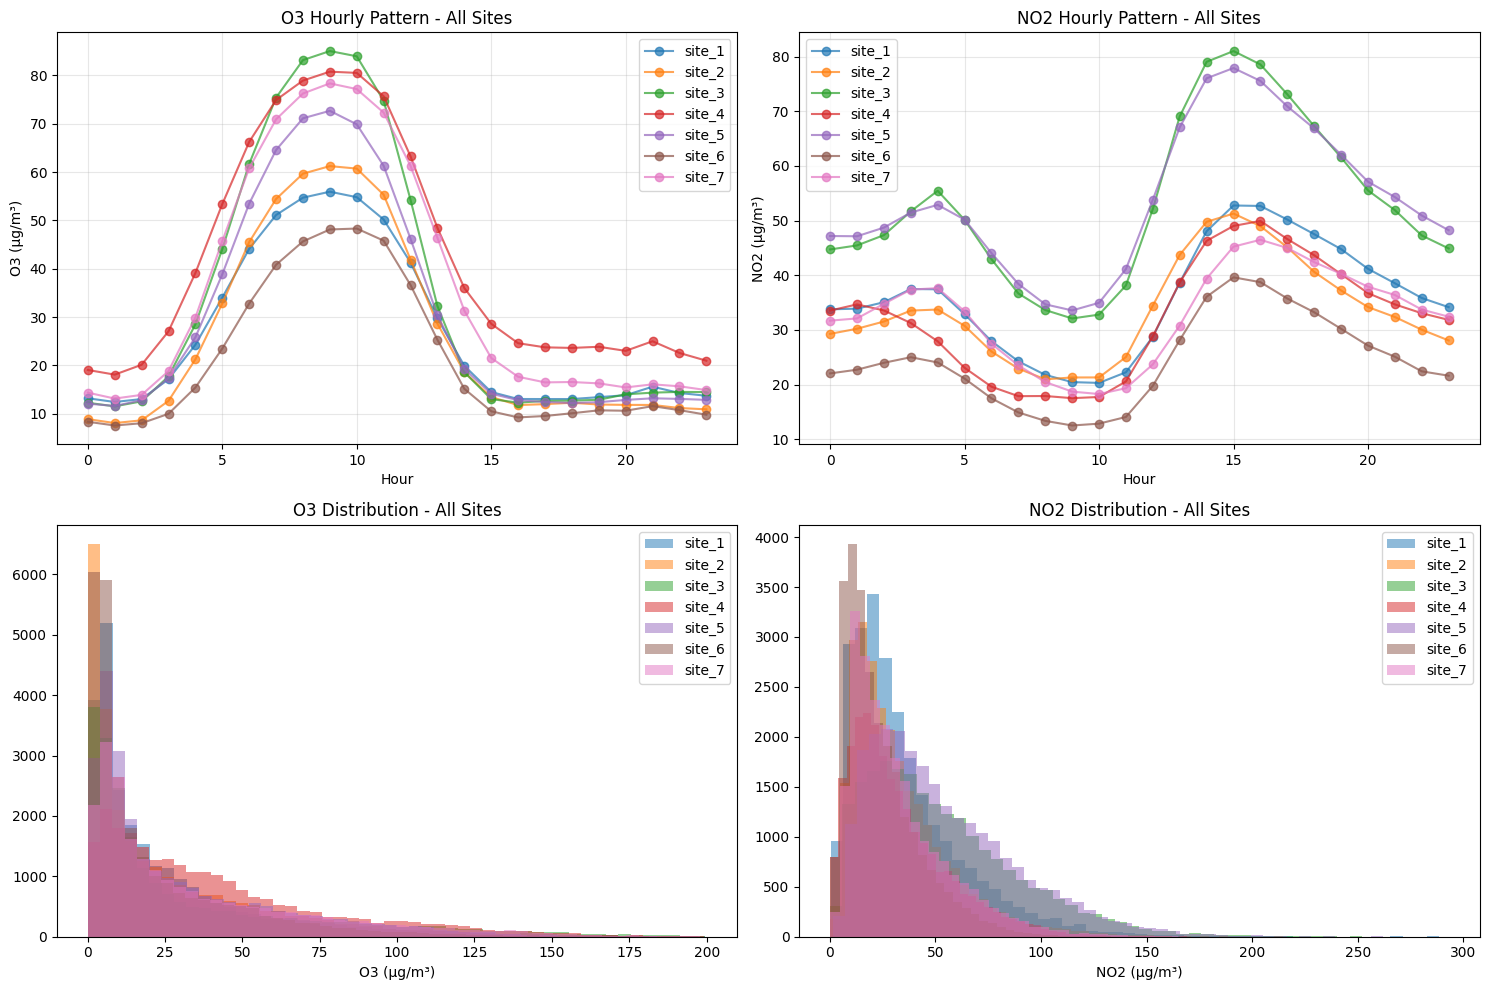

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load all sites
sites = {}
for i in range(1, 8):  # Assuming sites 1-7
    try:
        sites[f'site_{i}'] = pd.read_csv(f'site_{i}_train_data.csv')
        print(f"Site {i} loaded: {sites[f'site_{i}'].shape}")
    except:
        print(f"Site {i} not found")

# Compare sites
print("\n" + "="*70)
print("SITE COMPARISON:")
print("="*70)

comparison = []
for site_name, df in sites.items():
    stats = {
        'Site': site_name,
        'Rows': len(df),
        'O3_mean': df['O3_target'].mean(),
        'O3_std': df['O3_target'].std(),
        'NO2_mean': df['NO2_target'].mean(),
        'NO2_std': df['NO2_target'].std(),
        'O3_max': df['O3_target'].max(),
        'NO2_max': df['NO2_target'].max(),
        'Satellite_coverage': (1 - df['NO2_satellite'].isna().sum() / len(df)) * 100
    }
    comparison.append(stats)

comparison_df = pd.DataFrame(comparison)
print(comparison_df.to_string())

# Visualize site differences
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# O3 comparison
for site_name, df in sites.items():
    hourly_o3 = df.groupby('hour')['O3_target'].mean()
    axes[0, 0].plot(hourly_o3.index, hourly_o3.values, marker='o', label=site_name, alpha=0.7)
axes[0, 0].set_title('O3 Hourly Pattern - All Sites')
axes[0, 0].set_xlabel('Hour')
axes[0, 0].set_ylabel('O3 (μg/m³)')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# NO2 comparison
for site_name, df in sites.items():
    hourly_no2 = df.groupby('hour')['NO2_target'].mean()
    axes[0, 1].plot(hourly_no2.index, hourly_no2.values, marker='o', label=site_name, alpha=0.7)
axes[0, 1].set_title('NO2 Hourly Pattern - All Sites')
axes[0, 1].set_xlabel('Hour')
axes[0, 1].set_ylabel('NO2 (μg/m³)')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# O3 distribution comparison
for site_name, df in sites.items():
    axes[1, 0].hist(df['O3_target'], bins=50, alpha=0.5, label=site_name)
axes[1, 0].set_title('O3 Distribution - All Sites')
axes[1, 0].set_xlabel('O3 (μg/m³)')
axes[1, 0].legend()

# NO2 distribution comparison
for site_name, df in sites.items():
    axes[1, 1].hist(df['NO2_target'], bins=50, alpha=0.5, label=site_name)
axes[1, 1].set_title('NO2 Distribution - All Sites')
axes[1, 1].set_xlabel('NO2 (μg/m³)')
axes[1, 1].legend()

plt.tight_layout()
plt.savefig('all_sites_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

Site 1 loaded: (25081, 16)
Site 2 loaded: (25969, 16)
Site 3 loaded: (21913, 16)
Site 4 loaded: (24505, 16)
Site 5 loaded: (25081, 16)
Site 6 loaded: (26353, 16)
Site 7 loaded: (22777, 16)

SITE COMPARISON:
     Site   Rows    O3_mean     O3_std   NO2_mean    NO2_std  O3_max  NO2_max  Satellite_coverage
0  site_1  25081  26.685846  31.532385  35.846456  28.289381  199.35   288.57            3.297317
1  site_2  25969  26.066287  30.138552  33.425066  24.411113  199.00   219.23            3.323193
2  site_3  21913  34.036256  40.285963  53.004816  35.769589  199.30   293.10            3.276594
3  site_4  24505  41.570014  36.352691  32.273174  23.580325  199.20   192.33            3.289125
4  site_5  25081  30.145630  31.581547  53.533371  34.601227  199.90   284.70            3.261433
5  site_6  26353  21.014273  25.817975  24.235430  18.350731  197.10   207.82            3.214055
6  site_7  22777  35.890433  36.774676  32.842614  23.649665  197.80   235.48            3.323528


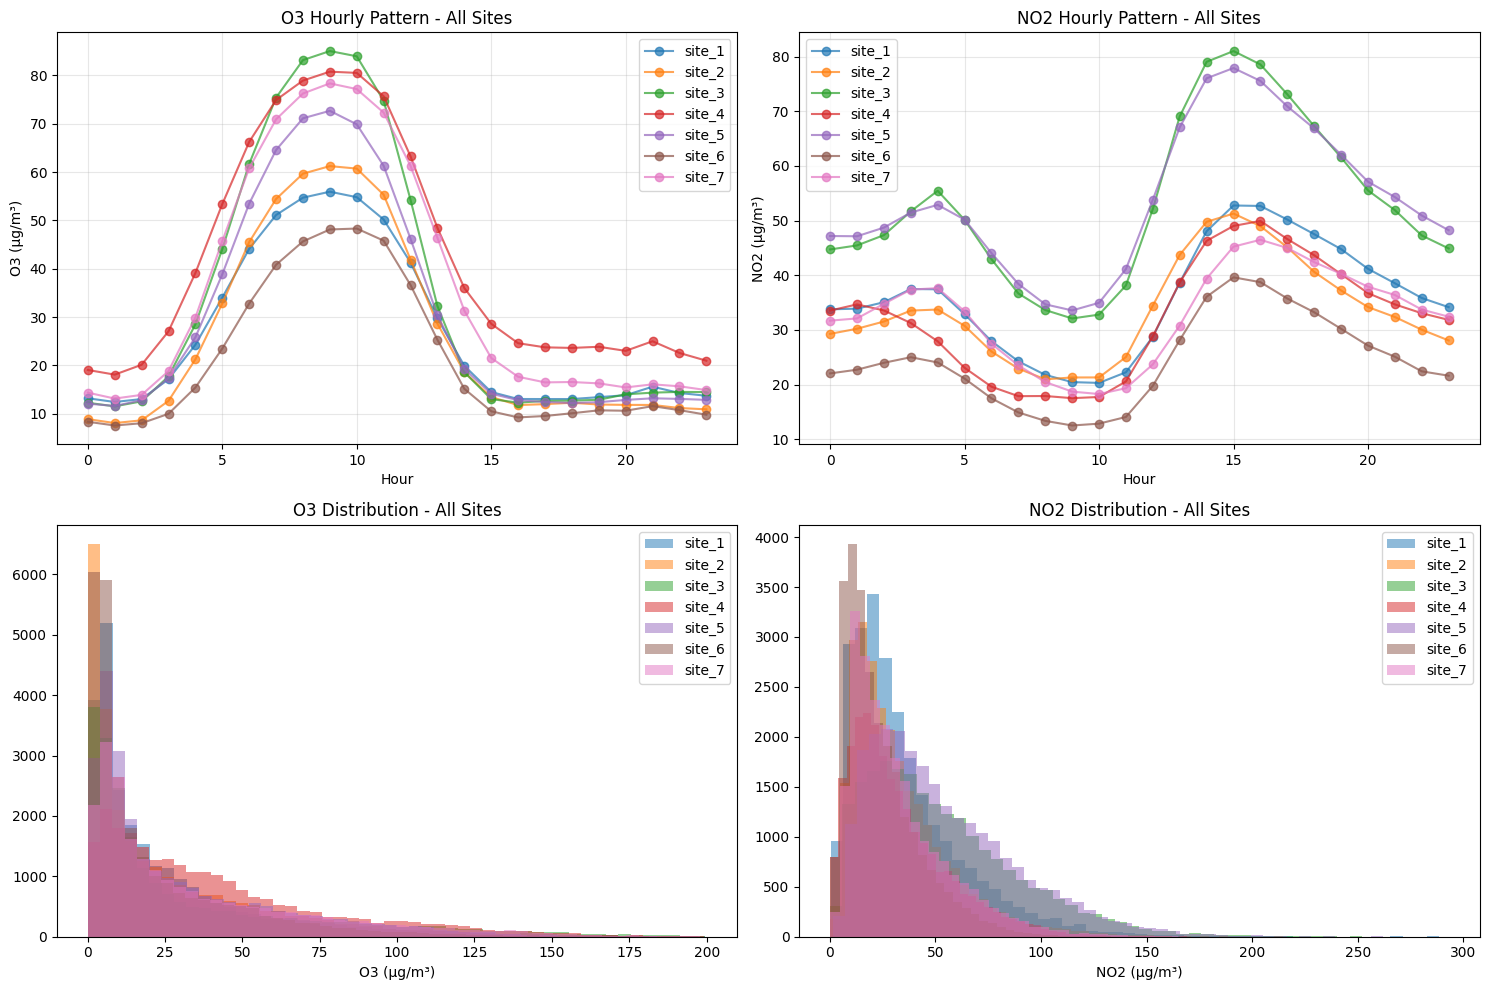


✅ All plots saved successfully in the 'plots/' folder.


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# Create folder for saving plots
os.makedirs("plots", exist_ok=True)

# Load all sites
sites = {}
for i in range(1, 8):  # Assuming sites 1-7
    try:
        sites[f'site_{i}'] = pd.read_csv(f'site_{i}_train_data.csv')
        print(f"Site {i} loaded: {sites[f'site_{i}'].shape}")
    except:
        print(f"Site {i} not found")

# Compare sites
print("\n" + "="*70)
print("SITE COMPARISON:")
print("="*70)

comparison = []
for site_name, df in sites.items():
    stats = {
        'Site': site_name,
        'Rows': len(df),
        'O3_mean': df['O3_target'].mean(),
        'O3_std': df['O3_target'].std(),
        'NO2_mean': df['NO2_target'].mean(),
        'NO2_std': df['NO2_target'].std(),
        'O3_max': df['O3_target'].max(),
        'NO2_max': df['NO2_target'].max(),
        'Satellite_coverage': (1 - df['NO2_satellite'].isna().sum() / len(df)) * 100
    }
    comparison.append(stats)

comparison_df = pd.DataFrame(comparison)
print(comparison_df.to_string())

# Visualize site differences
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# O3 comparison
for site_name, df in sites.items():
    hourly_o3 = df.groupby('hour')['O3_target'].mean()
    axes[0, 0].plot(hourly_o3.index, hourly_o3.values, marker='o', label=site_name, alpha=0.7)
axes[0, 0].set_title('O3 Hourly Pattern - All Sites')
axes[0, 0].set_xlabel('Hour')
axes[0, 0].set_ylabel('O3 (μg/m³)')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# NO2 comparison
for site_name, df in sites.items():
    hourly_no2 = df.groupby('hour')['NO2_target'].mean()
    axes[0, 1].plot(hourly_no2.index, hourly_no2.values, marker='o', label=site_name, alpha=0.7)
axes[0, 1].set_title('NO2 Hourly Pattern - All Sites')
axes[0, 1].set_xlabel('Hour')
axes[0, 1].set_ylabel('NO2 (μg/m³)')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# O3 distribution comparison
for site_name, df in sites.items():
    axes[1, 0].hist(df['O3_target'], bins=50, alpha=0.5, label=site_name)
axes[1, 0].set_title('O3 Distribution - All Sites')
axes[1, 0].set_xlabel('O3 (μg/m³)')
axes[1, 0].legend()

# NO2 distribution comparison
for site_name, df in sites.items():
    axes[1, 1].hist(df['NO2_target'], bins=50, alpha=0.5, label=site_name)
axes[1, 1].set_title('NO2 Distribution - All Sites')
axes[1, 1].set_xlabel('NO2 (μg/m³)')
axes[1, 1].legend()

plt.tight_layout()
plt.savefig('plots/all_sites_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# --- Save each subplot individually ---
titles = [
    "O3_Hourly_Pattern",
    "NO2_Hourly_Pattern",
    "O3_Distribution",
    "NO2_Distribution"
]

for ax, title in zip(axes.flat, titles):
    fig_single, ax_single = plt.subplots(figsize=(8, 5))
    for line in ax.get_lines():
        ax_single.plot(line.get_xdata(), line.get_ydata(), label=line.get_label())
    for patch in ax.patches:  # For histograms
        ax_single.bar(patch.get_x(), patch.get_height(), width=patch.get_width(),
                      alpha=patch.get_alpha(), label=patch.get_label())
    ax_single.set_title(ax.get_title())
    ax_single.set_xlabel(ax.get_xlabel())
    ax_single.set_ylabel(ax.get_ylabel())
    ax_single.legend()
    ax_single.grid(True, alpha=0.3)
    fig_single.tight_layout()
    fig_single.savefig(f"plots/{title}.png", dpi=300, bbox_inches='tight')
    plt.close(fig_single)

print("\n✅ All plots saved successfully in the 'plots/' folder.")
